In [158]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import clear_output

import torch

In [65]:
filepath = 'stats players.csv'
df = pd.read_csv(filepath)
df = df.dropna(axis=1)
df = df.drop(columns=['birthday_GMT', 'birthday'])

In [66]:
df.head()

,full_name,age,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,Premier League,2018/2019,Defender,West Ham United,1589,888,701,England,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,35,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,England,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,32,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,Australia,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,31,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,Wales,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,22,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,England,...,1.30,69,35,0,0,0.00,-1,-1,-1,31


In [67]:
cols = df.columns
print(f'total features foe each player: {len(cols)}')

total features foe each player: 45


Select only numeric columns

In [68]:
df_num = df.select_dtypes(include='number')
df_num.head()

,age,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,32,1589,888,701,20,11,9,0,0,0,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,35,1217,487,730,16,7,9,1,1,0,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,32,2327,1190,1137,29,15,14,3,1,2,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,31,1327,689,638,28,14,14,4,2,2,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,22,69,14,55,2,1,1,0,0,0,...,1.30,69,35,0,0,0.00,-1,-1,-1,31


In [69]:
cols2 = df_num.columns
print(f'total features foe each player: {len(cols2)}')

total features foe each player: 39


### Getting Labels

['Defender' 'Forward' 'Goalkeeper' 'Midfielder']


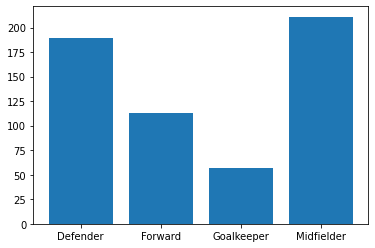

In [195]:
y = df['position']
u, c = np.unique(y, return_counts=True)
print(u)
plt.bar(u,c);

In [196]:
y2 = np.array(y)
type(y2)

numpy.ndarray

In [197]:
def get_dummy_position(x):
    if x == 'Goalkeeper':
        f = [1, 0, 0, 0]
    elif x == 'Defender':
        f = [0, 1, 0, 0]
    elif x == 'Midfielder':
        f = [0, 0, 1, 0]
    elif x == 'Forward':
        f = [0, 0, 0, 1]
    else:
        raise ValueError("Wrong position name!!!!!!!!!!!!!!!!!")
    return f

def find_index(lista):
    for i, elemento in enumerate(lista):
        if elemento == 1:
            return i
    return None

In [200]:
y2_dummy, y2_indexes = [], []
for i in range(len(y2)):
    y2_dummy.append(get_dummy_position(y2[i]))
    y2_indexes.append(find_index(y2_dummy[i]))
y2_dummy = np.array(y2_dummy)

In [202]:
y2_dummy_tensor = torch.tensor(y2_dummy)

### Getting Features

In [203]:
# Convertiamo il DataFrame in un tensore PyTorch
tensor = torch.tensor(df_num.values, dtype=torch.float32)
mean = torch.mean(tensor)
std = torch.std(tensor)

# Normalizziamo il tensore
tensor = (tensor - mean) / std

In [204]:
tensor[0]

tensor([-0.2187,  3.7393,  1.9573,  1.4819, -0.2492, -0.2721, -0.2772, -0.3000,
        -0.3000, -0.3000, -0.2975, -0.2975, -0.3000, -0.3000, -0.3000, -0.2924,
        -0.2950, -0.2975, -0.2441, -0.2695, -0.2746, -0.2975, -0.3000, -0.2999,
        -0.2999, -0.3000, -0.3000, -0.3000, -0.3000, -0.2969, -0.1170, -0.0992,
         3.7393,  3.7393, -0.2999,  0.4372,  0.1855, -0.0967, -0.2492])

# Set X, y

In [205]:
X = tensor.clone()
y = y2_dummy_tensor.clone()

In [206]:
# check sizes
print(f'Data shape: {X.shape}')
print(f'Labels shape: {y.shape}')

Data shape: torch.Size([570, 39])
Labels shape: torch.Size([570, 4])


Divide in training and validation

In [235]:
perc = 0.8
L = int(X.shape[0] * perc)
print(f'Training Samples: {L}')

X_train, X_val = X[:L], X[L:]
y_train, y_val = y[:L], y[L:]
y_indexes_train, y_indexes_val = y2_indexes[:L], y2_indexes[:L]

# check
print(f'Training Data shape: {X_train.shape}')
print(f'Training Labels shape: {y_train.shape}')

Training Samples: 456
Training Data shape: torch.Size([456, 39])
Training Labels shape: torch.Size([456, 4])


--------------------------------------------------------

## Built Autoencoder

In [208]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset, DataLoader
from torch import nn

In [209]:
input_dimension = X_train.shape[1]
print(f'input dimension: {input_dimension}')

input dimension: 39


In [290]:
class Encoder(nn.Module):
    
    def __init__(self, encoded_space_dim):
        super().__init__()

        ### Linear section
        self.encoder_lin = nn.Sequential(
            # -----------1st
            nn.Linear(in_features=39, out_features=30),
            nn.Dropout(0.2),
            nn.SELU(),
            # -----------2nd
            nn.Linear(in_features=30, out_features=15),
            nn.Dropout(0.2),
            nn.SELU(),
            # -----------3rd
            nn.Linear(in_features=15, out_features=10),
            nn.SELU(),
            # -----------4th
            nn.Linear(in_features=10, out_features=encoded_space_dim)
        )
        
    def forward(self, x):
        x = self.encoder_lin(x)
        return x

In [291]:
class Decoder(nn.Module):
    
    def __init__(self, encoded_space_dim):
        super().__init__()

        ### Linear section
        self.decoder_lin = nn.Sequential(
            # -------------1st
            nn.Linear(in_features=encoded_space_dim, out_features=10),
            nn.SELU(),
            # ------------2nd
            nn.Linear(in_features=10, out_features=15),
            nn.SELU(),
             # ------------3rd
            nn.Linear(in_features=15, out_features=30),
            nn.SELU(),
             # ------------4th
            nn.Linear(in_features=30, out_features=39),
        )

        
    def forward(self, x):
        x = self.decoder_lin(x)
#         x = torch.sigmoid(x)
        return x

In [292]:
# check Enc-Dec working
t_ex = X_train[10]
enc = Encoder(2)
dec = Decoder(2)
encoded_ex = enc(t_ex)
decoded_ex = dec(encoded_ex)
print(decoded_ex)

tensor([-0.2366,  0.5859, -0.1697, -0.0391, -0.5756, -0.0354, -0.1714,  0.2005,
         0.2565, -0.0863,  0.3287,  0.1982,  0.3547, -0.2872, -0.2072, -0.3800,
        -0.2305,  0.2983, -0.0266, -0.2770,  0.1263, -0.1024,  0.0456,  0.2350,
         0.2527, -0.2716, -0.0588, -0.0077,  0.0518, -0.0229, -0.1298,  0.1894,
        -0.3209, -0.3253,  0.2543, -0.3937,  0.0544, -0.3839,  0.7038],
       grad_fn=<AddBackward0>)


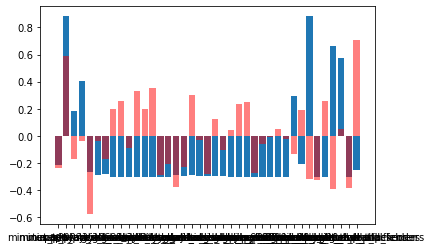

In [293]:
plt.bar(df_num.columns, t_ex)
plt.bar(df_num.columns, decoded_ex.detach().numpy(), color='red', alpha=0.5);

Get Dataloaders

In [294]:
batch_size = 32

# Creare un oggetto TensorDataset
X_train_dataloader = DataLoader(TensorDataset(X_train), batch_size=batch_size, shuffle=False, drop_last=True)
X_val_dataloader = DataLoader(TensorDataset(X_val), batch_size=batch_size, shuffle=False, drop_last=True)
y_train_dataloader = DataLoader(TensorDataset(y_train), batch_size=batch_size, shuffle=False, drop_last=True)
y_val_dataloader = DataLoader(TensorDataset(y_val), batch_size=batch_size, shuffle=False, drop_last=True)
for i,d in enumerate(X_train_dataloader):
    print(f'{i + 1} batches')
    print(f'{type(d[0])}')

1 batches
<class 'torch.Tensor'>
2 batches
<class 'torch.Tensor'>
3 batches
<class 'torch.Tensor'>
4 batches
<class 'torch.Tensor'>
5 batches
<class 'torch.Tensor'>
6 batches
<class 'torch.Tensor'>
7 batches
<class 'torch.Tensor'>
8 batches
<class 'torch.Tensor'>
9 batches
<class 'torch.Tensor'>
10 batches
<class 'torch.Tensor'>
11 batches
<class 'torch.Tensor'>
12 batches
<class 'torch.Tensor'>
13 batches
<class 'torch.Tensor'>
14 batches
<class 'torch.Tensor'>


Initialize parameters for training

-----------------------

In [295]:
### Training function
def train_epoch(encoder, decoder, device, dataloader, loss_fn, optimizer):
    # Set train mode for both the encoder and the decoder
    encoder.train()
    decoder.train()
    losses = []
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for x in dataloader: # with "_" we just ignore the labels (the second element of the dataloader tuple)
        # Move tensor to the proper device
        x = x[0].to(device)
        # Encode data
        encoded_data = encoder(x)
        # Decode data
        decoded_data = decoder(encoded_data)
        # Evaluate loss
        loss = loss_fn(decoded_data, x)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.detach().cpu().numpy())
    losses = np.mean(losses)
    return losses

In [296]:
### Testing function
def test_epoch(encoder, decoder, device, dataloader, loss_fn):
    # Set evaluation mode for encoder and decoder
    encoder.eval()
    decoder.eval()
    with torch.no_grad(): # No need to track the gradients
        # Define the lists to store the outputs for each batch
        conc_out = []
        conc_label = []
        for x in dataloader:
            # Move tensor to the proper device
            x = x[0].to(device)
            # Encode data
            encoded_data = encoder(x)
            # Decode data
            decoded_data = decoder(encoded_data)
            # Append the network output and the original image to the lists
            conc_out.append(decoded_data.cpu())
            conc_label.append(x.cpu())
        # Create a single tensor with all the values in the lists
        conc_out = torch.cat(conc_out)
        conc_label = torch.cat(conc_label) 
        # Evaluate global loss
        val_loss = loss_fn(conc_out, conc_label)
    return val_loss.data

----------------

In [302]:
latent_space = 4
encoder = Encoder(latent_space)
decoder = Decoder(latent_space)

### Define the loss function
loss_fn = torch.nn.MSELoss()
# loss_fn = nn.CrossEntropyLoss()

### Define an optimizer (both for the encoder and the decoder!)
lr = 5e-4 # Learning rate
params_to_optimize = [
    {'params': encoder.parameters(), "lr": 0.0001},
    {'params': decoder.parameters(), "lr": 0.0001}
]
optimizer = torch.optim.Adam(params_to_optimize, lr=lr, weight_decay=1e-5)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

# Move both the encoder and the decoder to the selected device
encoder.to(device)
decoder.to(device)

Selected device: cpu


Decoder(
  (decoder_lin): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): SELU()
    (2): Linear(in_features=10, out_features=15, bias=True)
    (3): SELU()
    (4): Linear(in_features=15, out_features=30, bias=True)
    (5): SELU()
    (6): Linear(in_features=30, out_features=39, bias=True)
  )
)

In [303]:
### Training cycle
num_epochs = 1500
TL, VL = [], []
for epoch in range(num_epochs):
    clear_output(wait=True)
    print('EPOCH %d/%d' % (epoch + 1, num_epochs))
    ### Training (use the training function)
    train_loss = train_epoch(
        encoder=encoder, 
        decoder=decoder, 
        device=device, 
        dataloader=X_train_dataloader, 
        loss_fn=loss_fn, 
        optimizer=optimizer)
    print(f'TRAIN - EPOCH {epoch+1}/{num_epochs} - loss: {train_loss}')
    TL.append(train_loss)

    ### Validation  (use the testing function)
    val_loss = test_epoch(
        encoder=encoder, 
        decoder=decoder, 
        device=device, 
        dataloader=X_val_dataloader, 
        loss_fn=loss_fn)
    # Print Validationloss
    print(f'VALIDATION - EPOCH {epoch+1}/{num_epochs} - loss: {val_loss}\n')
    VL.append(val_loss.item())


EPOCH 1500/1500
TRAIN - EPOCH 1500/1500 - loss: 0.045342136174440384
VALIDATION - EPOCH 1500/1500 - loss: 0.05410454422235489



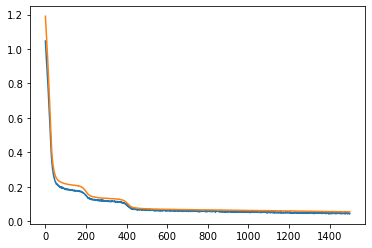

In [304]:
plt.plot(TL)
plt.plot(VL)

------------------------------

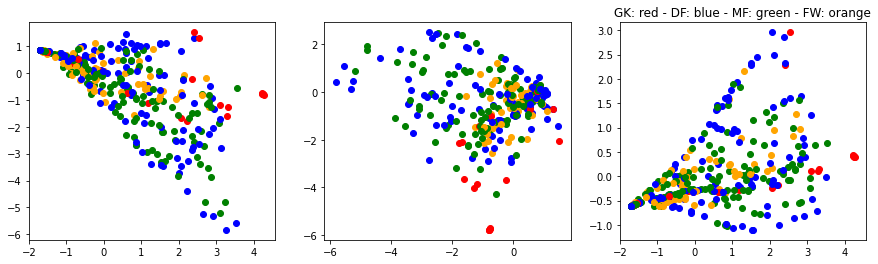

In [312]:
# check Enc-Dec working
encoder.eval()
decoder.eval()
colors = ['red', 'blue', 'green', 'orange', 'pink']

f, ax = plt.subplots(1, 3, figsize=(15,4))
for i in range(400):
    t_ex = X_train[i]
    encoded_ex = encoder(t_ex)
    decoded_ex = decoder(encoded_ex)
    # plot
    # f, ax = plt.subplots(1, 2, figsize=(12,4))
    # ax[0].bar(df_num.columns, t_ex)
    # ax[0].bar(df_num.columns, decoded_ex.detach().numpy(), color='red', alpha=0.5)
    ax[0].scatter(encoded_ex[0].item(), encoded_ex[1].item(), c=colors[y_indexes_train[i]])
    ax[1].scatter(encoded_ex[1].item(), encoded_ex[2].item(), c=colors[y_indexes_train[i]])
    ax[2].scatter(encoded_ex[0].item(), encoded_ex[3].item(), c=colors[y_indexes_train[i]])
    
plt.title('GK: red - DF: blue - MF: green - FW: orange');

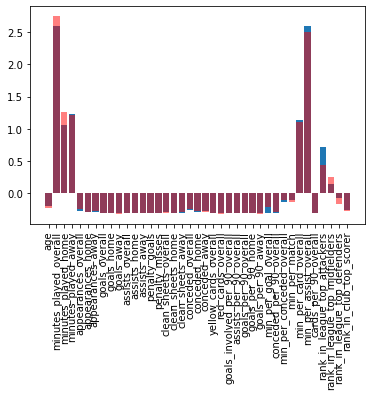

In [314]:
encoder.eval()
decoder.eval()

t_ex = X_train[89]
encoded_ex = encoder(t_ex)
decoded_ex = decoder(encoded_ex)
# plot
plt.bar(df_num.columns, t_ex)
plt.bar(df_num.columns, decoded_ex.detach().numpy(), color='red', alpha=0.5)
plt.xticks(rotation=90);